#### Appendix (LDA): Modeling with K-Topics Analysis

This notebook focuses on determining the optimal number of topics for the LDA model. It uses a systematic approach to find the most coherent topic model for the Copom minutes.
 * The script calculates the coherence score for LDA models with varying numbers of topics. The coherence score is a metric that measures how semantically similar the top words in each topic.
 * It iterates through 2 to 24 topics, runs an LDA model for each number, calculates the coherence score, and stores the results.
 * A plot is used to visualize how the coherence score changes with the number of topics.

In [3]:
import glob
import os
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
FOLDER_MINUTES_LEMMATIZED = "./data/processed/copom_minutes_lemmatized"
INITIAL_DATE = "2003-06-26"

In [5]:
minutes_info = pd.read_excel("./data/raw/minutes_info.xlsx")
minutes_info['DataReferencia'] = pd.to_datetime(minutes_info['DataReferencia'])
minutes_info = minutes_info[minutes_info["DataReferencia"] >= INITIAL_DATE]

minutes_names = minutes_info["Titulo"].to_list()
filepaths = [f"{FOLDER_MINUTES_LEMMATIZED}/{minute}.txt" for minute in minutes_names]

In [6]:
all_docs_with_metadata = []
all_docs_for_lda = []

for path in filepaths:
    filename = os.path.basename(path)
    with open(path, 'r', encoding='utf-8') as f:
        paragraphs = [line.split() for line in f.readlines() if len(line.split()) > 5]
        for p in paragraphs:
            all_docs_with_metadata.append({'text': p, 'filename': filename})
            all_docs_for_lda.append(p)

In [7]:
dictionary = corpora.Dictionary(all_docs_for_lda)

corpus = [dictionary.doc2bow(doc) for doc in all_docs_for_lda]

# How many topics to use?

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Calculate the coherence score for multiple number of topics.
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"N of Topics: {num_topics}\t-\tCoherence Value: {coherencemodel.get_coherence():.4f}")

    return model_list, coherence_values

In [9]:
limit=26
start=2
step=2

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=all_docs_for_lda, start=start, limit=limit, step=step
)

N of Topics: 2	-	Coherence Value: 0.5415
N of Topics: 4	-	Coherence Value: 0.5311
N of Topics: 6	-	Coherence Value: 0.5923
N of Topics: 8	-	Coherence Value: 0.5686
N of Topics: 10	-	Coherence Value: 0.5683
N of Topics: 12	-	Coherence Value: 0.5439
N of Topics: 14	-	Coherence Value: 0.5313
N of Topics: 16	-	Coherence Value: 0.5219
N of Topics: 18	-	Coherence Value: 0.5196
N of Topics: 20	-	Coherence Value: 0.5351
N of Topics: 22	-	Coherence Value: 0.5127
N of Topics: 24	-	Coherence Value: 0.5396


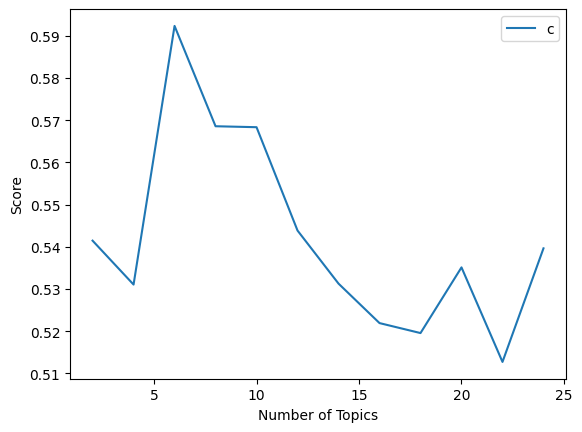

In [12]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
topics_k_6 = model_list[2].print_topics(num_words=10)
for topic in topics_k_6:
    print(topic)

(0, '0.031*"employment" + 0.029*"increase" + 0.021*"real" + 0.020*"accord" + 0.019*"rate" + 0.019*"job" + 0.018*"month" + 0.018*"year" + 0.018*"compare" + 0.017*"thousand"')
(1, '0.065*"rate" + 0.041*"inflation" + 0.034*"price" + 0.025*"projection" + 0.024*"meeting" + 0.022*"scenario" + 0.021*"copom" + 0.018*"exchange" + 0.017*"increase" + 0.017*"target"')
(2, '0.068*"billion" + 0.053*"u" + 0.030*"operation" + 0.023*"total" + 0.023*"credit" + 0.022*"reach" + 0.020*"month" + 0.019*"average" + 0.018*"increase" + 0.017*"export"')
(3, '0.018*"growth" + 0.017*"economy" + 0.014*"economic" + 0.013*"market" + 0.012*"demand" + 0.011*"activity" + 0.010*"domestic" + 0.010*"international" + 0.009*"high" + 0.009*"recovery"')
(4, '0.042*"increase" + 0.028*"month" + 0.027*"price" + 0.020*"good" + 0.015*"production" + 0.014*"industrial" + 0.014*"compare" + 0.013*"inflation" + 0.013*"sale" + 0.012*"index"')
(5, '0.057*"inflation" + 0.034*"monetary" + 0.028*"policy" + 0.023*"copom" + 0.018*"committee" +

Topic 0: Labor Market & Real Activity
 - employment, increase, real, accord, rate, job, month, year, compare, thousand

Topic 1: Inflation Scenario & Projections (COPOM's View)
 - rate, inflation, price, projection, meeting, scenario, copom, exchange, increase, target

Topic 2: External Sector & Credit Flows
 - billion, u, operation, total, credit, reach, month, average, increase, export

Topic 3: Economic Activity & Growth (Aggregate View)
 - growth, economy, economic, market, demand, activity, domestic, international, high, recovery

Topic 4: Price Indexes & Industrial Production
 - increase, month, price, good, production, industrial, compare, inflation, sale, index

Topic 5: Monetary Policy Deliberation & Risk Assessment
 - inflation, monetary, policy, copom, committee, risk, target, scenario, rate, expectation